In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [17]:
checkpoints = r'C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [18]:
train_dir = r'G:\ML\computer vision\train'
validation_dir = r'G:\ML\computer vision\validation'
test_dir = r'G:\ML\computer vision\test'

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

C:\Users\imran\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,087,426 (49.92 MB)

 Trainable params: 13,087,426 (49.92 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


In [28]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [32]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [34]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 8,
                         callbacks = callbacks)

C:\Users\imran\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.4828 - loss: 0.8291
Epoch 1: val_loss improved from inf to 0.69976, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0001-loss0.70.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - acc: 0.4813 - loss: 0.8288 - val_acc: 0.5000 - val_loss: 0.6998
Epoch 2/8
1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - acc: 0.4375 - loss: 0.7169

C:\Users\imran\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.69976
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - acc: 0.4375 - loss: 0.7169 - val_acc: 0.3750 - val_loss: 0.7106
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.4839 - loss: 0.6963
Epoch 3: val_loss improved from 0.69976 to 0.69488, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0003-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - acc: 0.4829 - loss: 0.6964 - val_acc: 0.4688 - val_loss: 0.6949
Epoch 4/8
1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - acc: 0.5000 - loss: 0.6903
Epoch 4: val_loss improved from 0.69488 to 0.68349, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0004-loss0.68.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - acc: 0.5000 - loss: 0.6903 - val_acc: 0.5312 - val_loss: 0.6835
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.5735 - loss: 0.6851
Epoch 5: val_loss did not improve from 0.68349
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - acc: 0.5721 - loss: 0.6847 - val_acc: 0.4375 - val_loss: 0.6952
Epoch 6/8
1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - acc: 0.3750 - loss: 0.6983
Epoch 6: val_loss did not improve from 0.68349
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - acc: 0.3750 - loss: 0.6983 - val_acc: 0.4375 - val_loss: 0.7553
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.5565 - loss: 0.6836
Epoch 7: val_loss did not improve from 0.68349
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - acc: 0.5621 - loss: 0.6825 - val_acc: 0.5000 - val_loss: 0.6974
Epoch 8/8
1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - acc: 0.4688 - loss: 0.7228
Epoch 8: val_loss improved from 0.68349 to 0.64620, saving model to C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0008-loss0.65.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - acc: 0.4688 - loss: 0.7228 - val_acc: 0.6562 - val_loss: 0.6462


In [36]:
model_history.history

{'acc': [0.4711538553237915,
  0.4375,
  0.4759615361690521,
  0.5,
  0.5625,
  0.375,
  0.6009615659713745,
  0.46875],
 'loss': [0.826359212398529,
  0.7168812155723572,
  0.6974366903305054,
  0.6903037428855896,
  0.6818268895149231,
  0.6983031034469604,
  0.6749438047409058,
  0.7228072881698608],
 'val_acc': [0.5, 0.375, 0.46875, 0.53125, 0.4375, 0.4375, 0.5, 0.65625],
 'val_loss': [0.6997602581977844,
  0.7106047868728638,
  0.6948776245117188,
  0.6834932565689087,
  0.6951985955238342,
  0.755256175994873,
  0.6973775029182434,
  0.6462027430534363]}

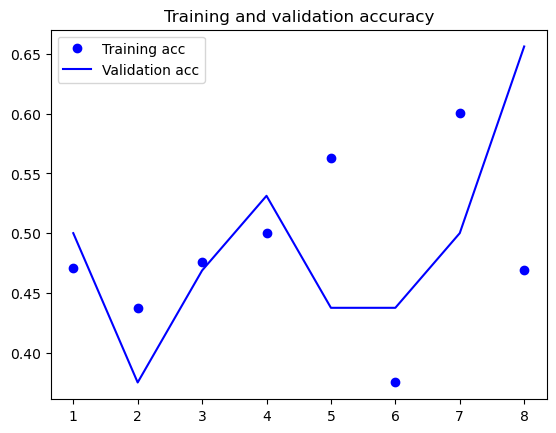

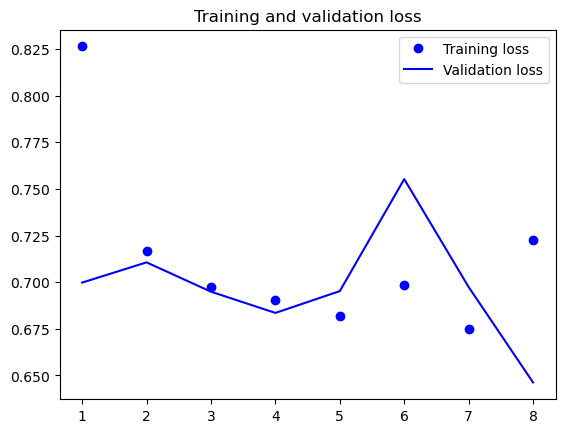

<Figure size 640x480 with 0 Axes>

In [38]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'G:\ML\computer vision\model_Accuracy.png')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (4).

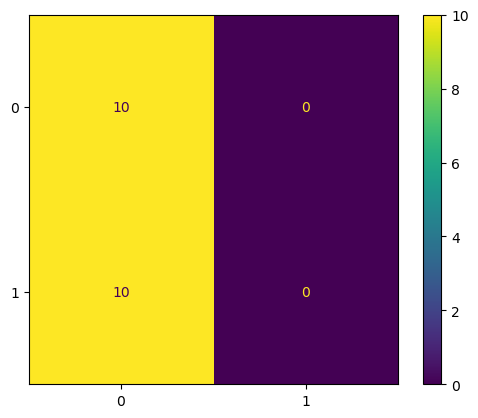

In [40]:
model = load_model(r'C:\Users\imran\anaconda3\envs\ZohaibLabs\E1-cp-0003-loss0.69.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [44]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust']))

              precision    recall  f1-score   support

  Cercospora       0.50      1.00      0.67        10
 common_rust       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



C:\Users\imran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\imran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\imran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
